- https://youtu.be/Q_MbN-vu_2w?si=TrCYKV6q64rN6-Fq
- https://youtu.be/qBs29egdVNU?si=9X_UuFSqqsLBNndo
- https://youtu.be/cZ5w3b9ES7Q?si=NaiWh-SkPjqmKlmS

# [자전거 공유 수요](https://www.kaggle.com/competitions/bike-sharing-demand/overview)
워싱턴D.C 소재의 자전거 대여 스타트업의 데이터를 활용하여, 특정 시간대에 얼마나 많은 사람들이 자전거를 대여하는지 예측하는 것이 목표!!

## 평가지표 - RMSLE
Root Mean Squared Logarithmic Error

## [Data 설명](https://www.kaggle.com/competitions/bike-sharing-demand/data?select=sampleSubmission.csv)

### Features

- datetime:  
  - hourly date + timestamp  
- season(계절):  
  - 1 = spring
  - 2 = summer
  - 3 = fall
  - 4 = winter
- holiday(휴일):  
  - whether the day is considered a holiday
- workingday(근무일):
  - whether the day is neither a weekend nor holiday
- weather(날씨):
  - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
  - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
  - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
  - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp(온도):
  - temperature in Celsius
- atemp(체감온도):
  - "feels like" temperature in Celsius
- humidity(습도):
  - relative humidity
- windspeed(풍속):
  - wind speed

### Target

- count:
  - 총 대여 수
  - number of total rentals

참고용
- casual:
  - 미등록 사용자 대여 개시 수
  - number of non-registered user rentals initiated
- registered:
  - 등록 사용자 대여 개시
  -  number of registered user rentals initiated

# Import Library

In [ ]:
import os
import datetime

# 데이터 분석
import numpy as np
import pandas as pd
from scipy import stats

# 데이터 시각화
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
plt.ion()
# 그래프에서 격자로 숫자 범위가 눈에 잘 띄도록 ggplot 스타일 사용
plt.style.use('ggplot')



# 데이터 분리
from sklearn.model_selection import train_test_split


# warning
import warnings
warnings.filterwarnings('ignore')

## Connect to google account

In [ ]:
from google.colab import drive
drive.mount('/content/data')

Mounted at /content/data


# Global Variables

In [ ]:
import easydict
import json
args = easydict.EasyDict()

# path
args.default_path = '/content/data/MyDrive/google_lecture/05. machine learning/Projects/kaggle/bike_sharing_demand/data/'
args.train_path = args.default_path+'train.csv'
args.test_path = args.default_path+'test.csv'
args.submission_path = args.default_path+'sampleSubmission.csv'

args.SEED = 42

# Load Data

## train data

In [ ]:
train = pd.read_csv(args.train_path)

print(train.shape)
train.head(3)

(10886, 12)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32


In [ ]:
train.tail(3)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129
10885,2012-12-19 23:00:00,4,0,1,1,13.12,16.665,66,8.9981,4,84,88


## test data

In [ ]:
test = pd.read_csv(args.test_path)

print(test.shape)
test.head(3)

(6493, 9)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000


In [ ]:
test.tail(3)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
6490,2012-12-31 21:00:00,1,0,1,1,10.66,12.880,60,11.0014
6491,2012-12-31 22:00:00,1,0,1,1,10.66,13.635,56,8.9981
6492,2012-12-31 23:00:00,1,0,1,1,10.66,13.635,65,8.9981


## submission data

In [ ]:
submission = pd.read_csv(args.submission_path)

print(submission.shape)
submission.head(3)

(6493, 2)


,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0


## 결측치 확인

In [ ]:
train.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [ ]:
test.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
dtype: int64

## 데이터 타입 확인

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    6493 non-null   object 
 1   season      6493 non-null   int64  
 2   holiday     6493 non-null   int64  
 3   workingday  6493 non-null   int64  
 4   weather     6493 non-null   int64  
 5   temp        6493 non-null   float64
 6   atemp       6493 non-null   float64
 7   humidity    6493 non-null   int64  
 8   windspeed   6493 non-null   float64
dtypes: float64(3), int64(5), object(1)
memory usage: 456.7+ KB


### 데이터 타입 변경

In [ ]:
train['datetime'] = pd.to_datetime(train['datetime'])
test['datetime'] = pd.to_datetime(test['datetime'])

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


## datetime 변수 생성

In [ ]:
print(f'before: {train.shape} / {test.shape}')

for data in [train, test]:
  data['year'] = data['datetime'].dt.year # 년도
  data['month'] = data['datetime'].dt.month # 월
  data['day'] = data['datetime'].dt.day # 일
  data['dayofweek'] = data['datetime'].dt.dayofweek # 요일
  data['quarter'] = data['datetime'].dt.quarter # 분기
  data['hour'] = data['datetime'].dt.hour # 시간
  data['minute'] = data['datetime'].dt.minute # 분
  data['second'] = data['datetime'].dt.second # 초

  data['weekend'] = data['dayofweek'].apply(lambda x: int(x in [5,6]))

print(f'after: {train.shape} / {test.shape}')

before: (10886, 12) / (6493, 9)
after: (10886, 21) / (6493, 18)


# EDA

## 전체 데이터 분석

<Axes: xlabel='second', ylabel='count'>

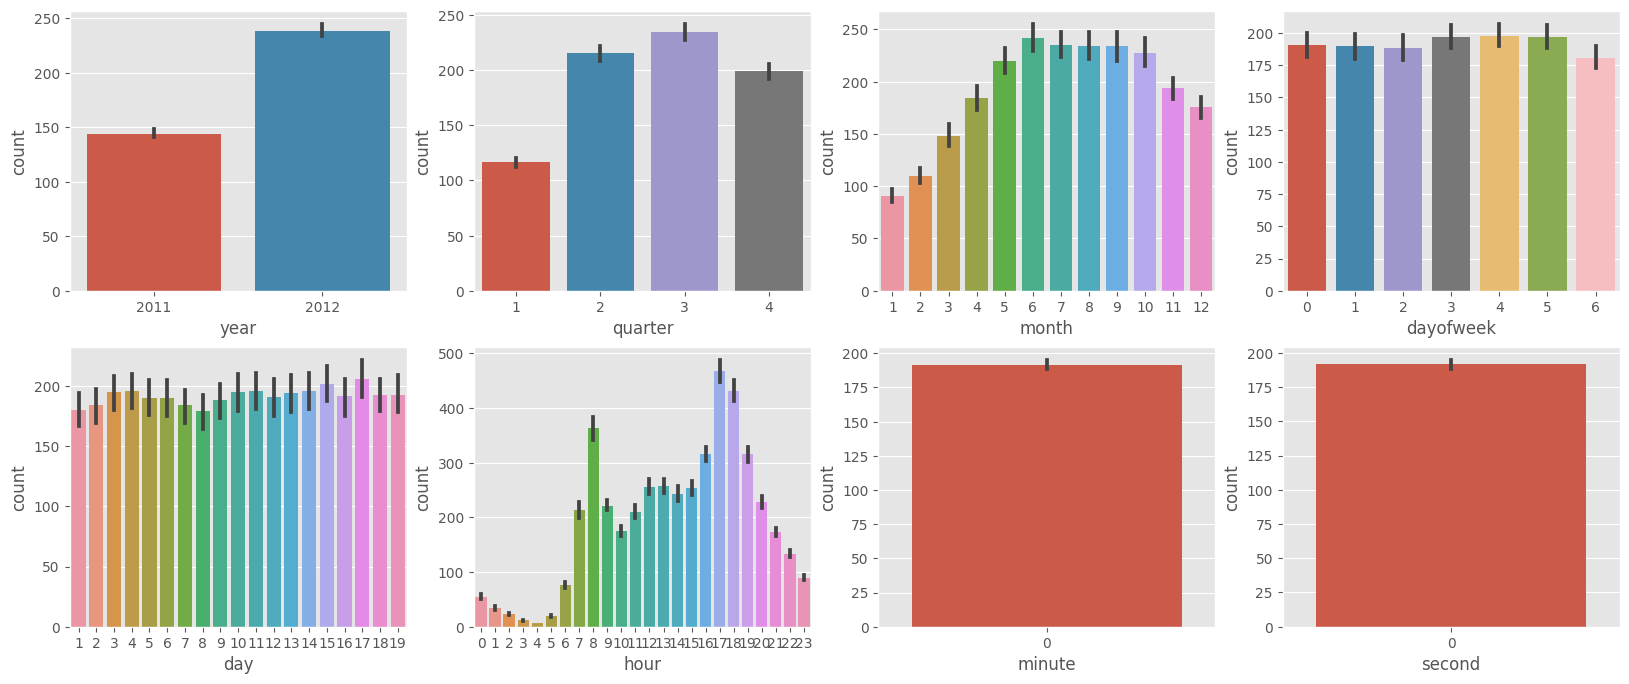

In [ ]:
figure, ((ax1, ax2, ax3, ax4), (ax5, ax6, ax7, ax8)) = plt.subplots(nrows=2, ncols=4)
figure.set_size_inches(20,8)

sns.barplot(data=train, x='year', y='count', ax=ax1) # 연도별 대여량
sns.barplot(data=train, x='quarter', y='count', ax=ax2) # 분기별 대여량
sns.barplot(data=train, x='month', y='count', ax=ax3) # 월별 대여량
sns.barplot(data=train, x='dayofweek', y='count', ax=ax4) # 요일별 대여량
sns.barplot(data=train, x='day', y='count', ax=ax5) # 일별 대여량
sns.barplot(data=train, x='hour', y='count', ax=ax6) # 시간별 대여량
sns.barplot(data=train, x='minute', y='count', ax=ax7)
sns.barplot(data=train, x='second', y='count', ax=ax8)


- 연도별 대여량은 2011년보다 2012년이 더 많다.
- 1분기때가 가장 대여량이 적다.
- 월별 대여량은 6월이 가장 많고 7 ~ 10월도 대여량이 많다. 하지만 1월에는 가장 적다.
- 요일별로는 크게 차이가 나지 않는다.
- 일별 대여량은 1일부터 19일까지만 있다. 그 이후 데이터는 test 데이터에 있는 것 같다.
  - 따라서 일별 대여량을 피처로 사용하기는 힘들 것 같다.
- 시간 대 대여량을 보면 출퇴근 시간에 대여량이 많은 것 같다.
- 분, 초에 대한 대여량은 의미가 없다.

<Axes: xlabel='hour', ylabel='count'>

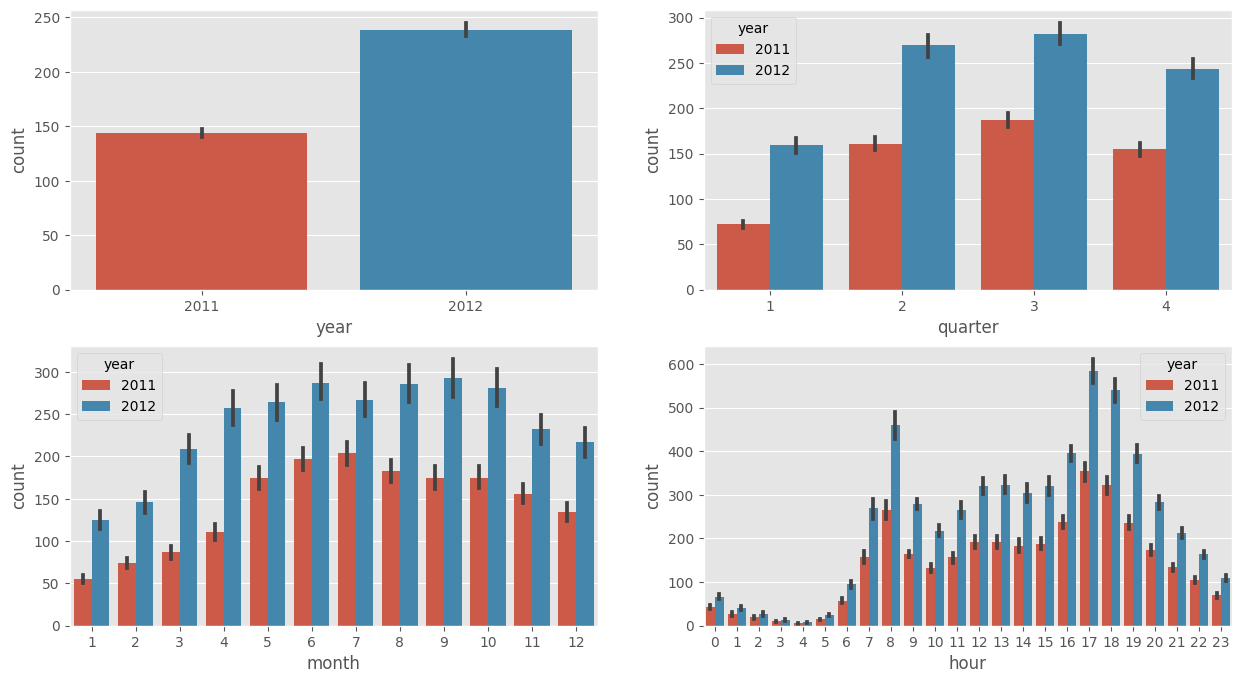

In [ ]:
figure, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2)
figure.set_size_inches(15,8)

sns.barplot(data=train, x='year', y='count', ax=ax1) # 연도별 대여량
sns.barplot(data=train, x='quarter', y='count', hue='year', ax=ax2) # 분기별 대여량
sns.barplot(data=train, x='month', y='count', hue='year', ax=ax3) # 월별 대여량
sns.barplot(data=train, x='hour', y='count', hue='year', ax=ax4) # 시간별 대여량

- 2011년도보다 2012년도가 전체적으로 사용량이 증가하였다.
- 분기, 월, 시간으로 비교하였을 때, 사용량은 증가하였지만, 추세나 모양은 비슷하다.

## 2012년 분석
2011년, 2012년 데이터의 형태가 비슷하여 2012년 데이터를 중심으로 분석

In [ ]:
train12 = train[train['year'] == 2012]
train12.shape

(5464, 21)

<Axes: xlabel='hour', ylabel='count'>

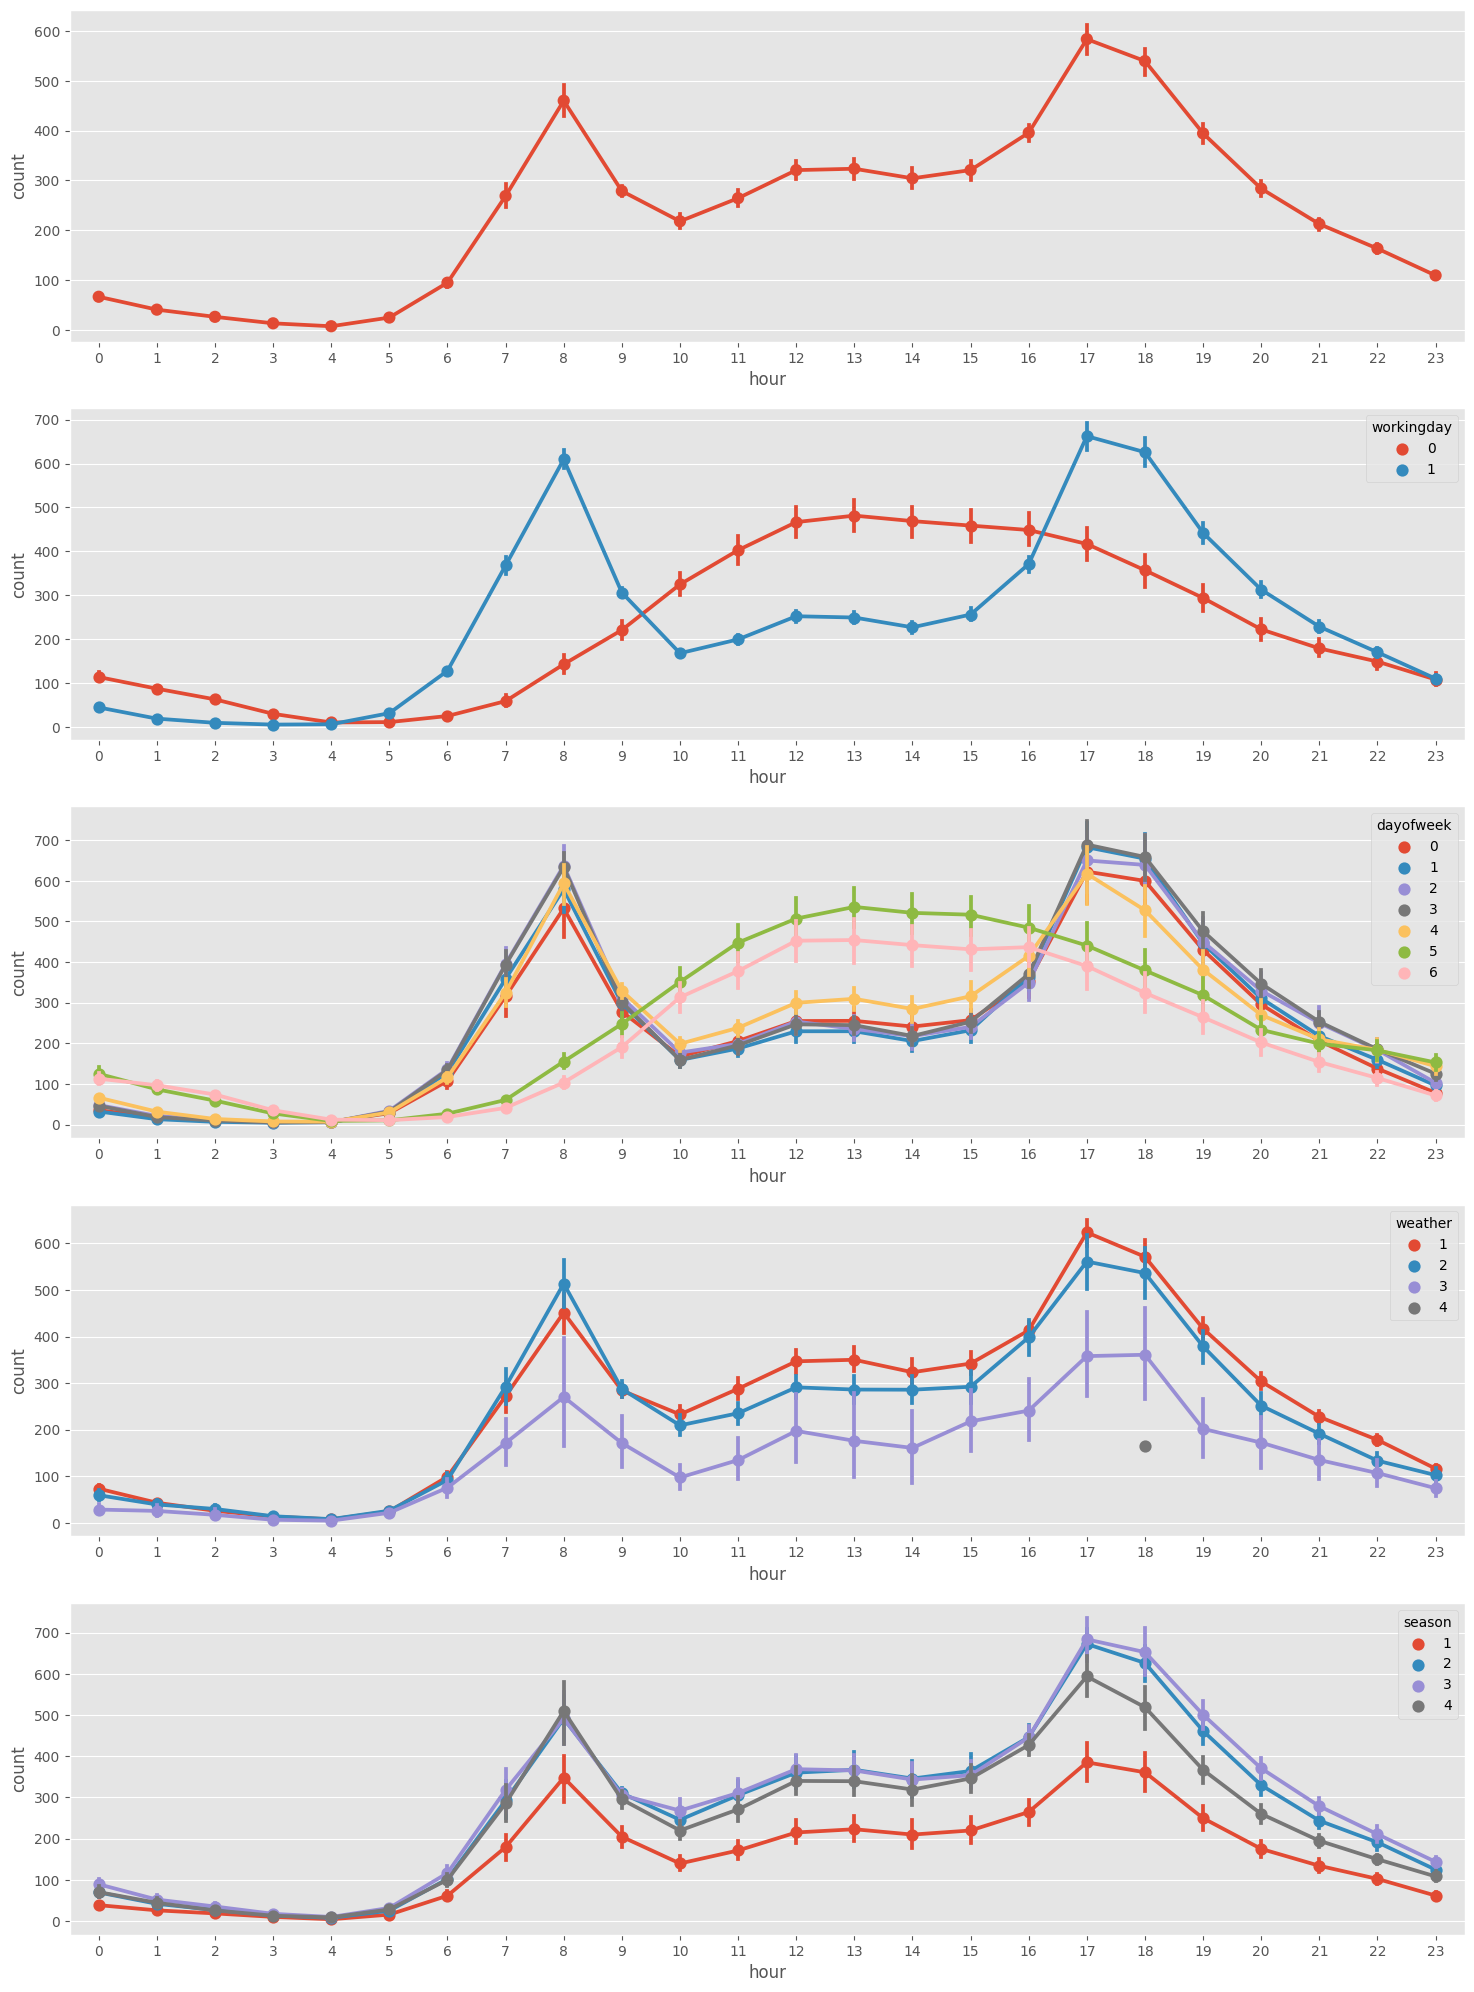

In [ ]:
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(nrows=5)
fig.set_size_inches(18,25)

sns.pointplot(data=train12, x='hour', y='count', ax=ax1)
sns.pointplot(data=train12, x='hour', y='count', hue='workingday', ax=ax2)
sns.pointplot(data=train12, x='hour', y='count', hue='dayofweek', ax=ax3)
sns.pointplot(data=train12, x='hour', y='count', hue='weather', ax=ax4)
sns.pointplot(data=train12, x='hour', y='count', hue='season', ax=ax5)


<Axes: xlabel='humidity', ylabel='count'>

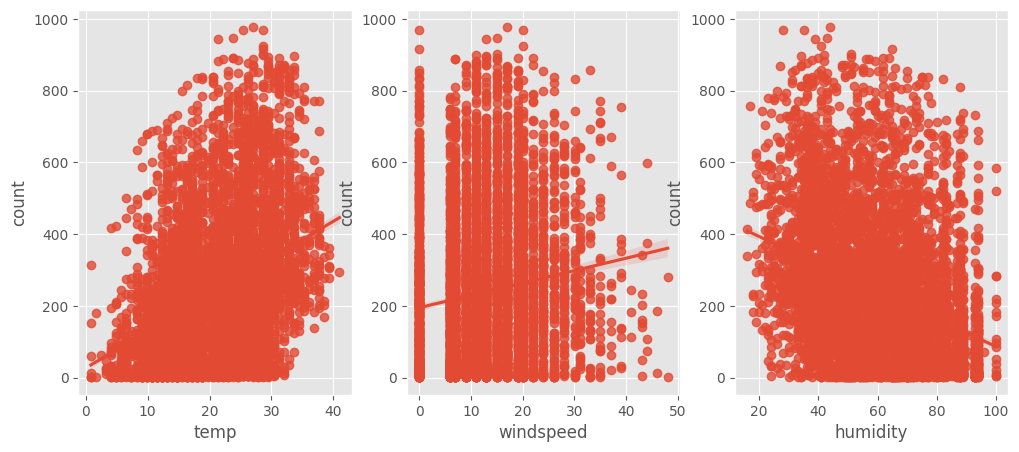

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3)
fig.set_size_inches(12,5)

sns.regplot(data=train12, x='temp', y='count', ax=ax1)
sns.regplot(data=train12, x='windspeed', y='count', ax=ax2)
sns.regplot(data=train12, x='humidity', y='count', ax=ax3)

- 풍속의 경우 0에 숫자가 몰려 있는 것으로 보인다.
  - 아마도 관측되지 않은 수치에 대해 0으로 기록된 것이 아닐까 추측해 본다.

<Axes: title={'center': 'train windspeed'}, xlabel='windspeed', ylabel='count'>

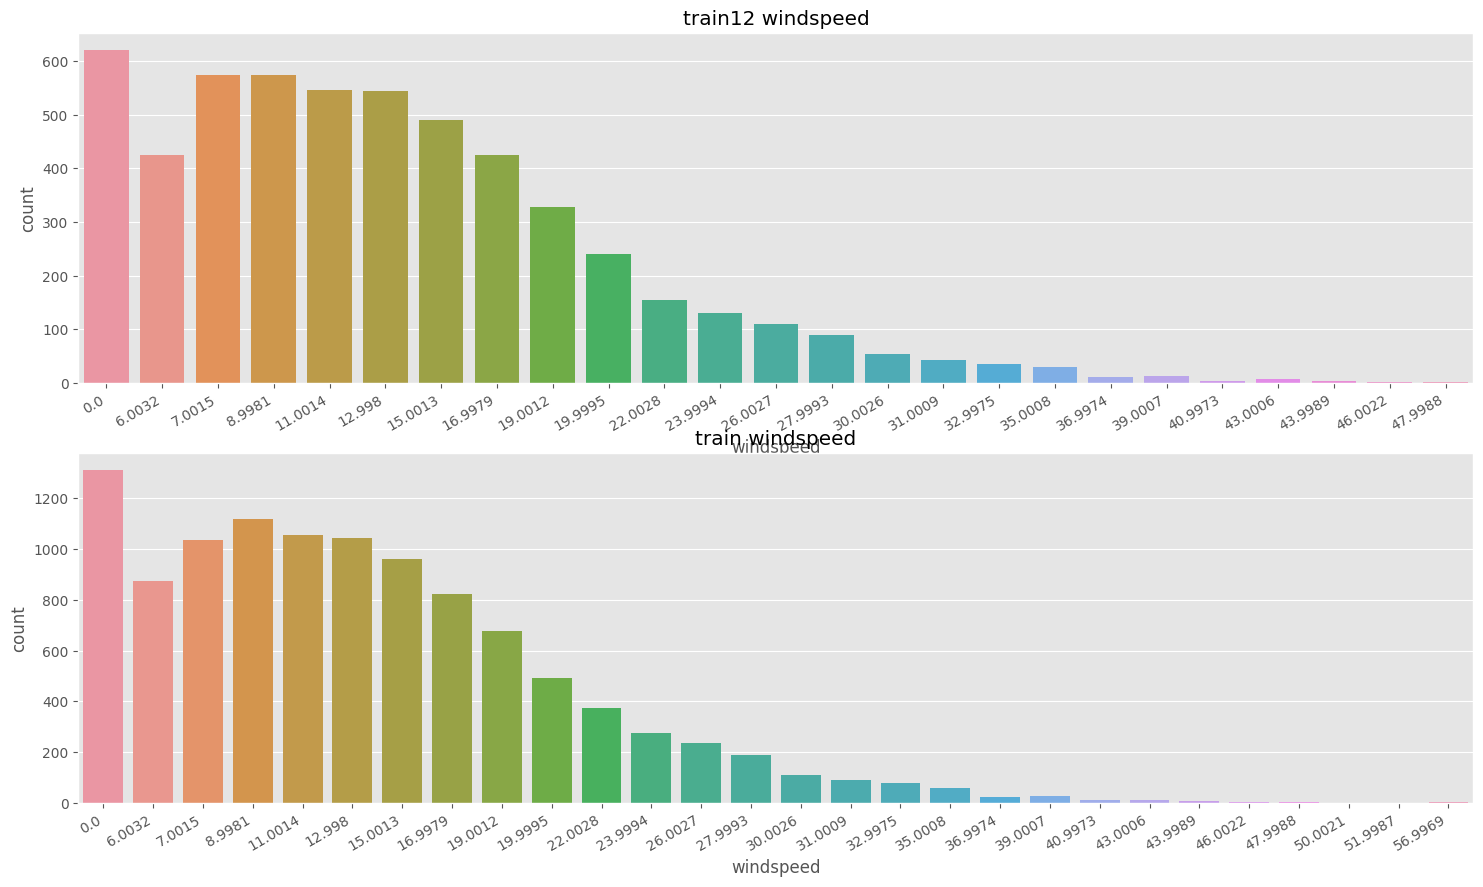

In [ ]:
fig, axes = plt.subplots(nrows=2)
fig.set_size_inches(18,10)

plt.sca(axes[0])
plt.xticks(rotation=30, ha='right')
axes[0].set(ylabel='count', title='train12 windspeed')
sns.countplot(data=train12, x='windspeed', ax=axes[0])

plt.sca(axes[1])
plt.xticks(rotation=30, ha='right')
axes[1].set(ylabel='count', title='train windspeed')
sns.countplot(data=train, x='windspeed', ax=axes[1])


### 상관관계

In [ ]:
df_corrMatt = train12[['temp', 'atemp', 'casual', 'registered', 'humidity', 'windspeed', 'count']]
corrMatt = df_corrMatt.corr()
corrMatt

,temp,atemp,casual,registered,humidity,windspeed,count
temp,1.000000,0.976952,0.456641,0.294173,-0.078231,-0.039806,0.373304
atemp,0.976952,1.000000,0.448837,0.289675,-0.056149,-0.075782,0.367369
casual,0.456641,0.448837,1.000000,0.470766,-0.399595,0.113165,0.671897
registered,0.294173,0.289675,0.470766,1.000000,-0.276264,0.120397,0.969746
humidity,-0.078231,-0.056149,-0.399595,-0.276264,1.000000,-0.350730,-0.342486
windspeed,-0.039806,-0.075782,0.113165,0.120397,-0.350730,1.000000,0.132384
count,0.373304,0.367369,0.671897,0.969746,-0.342486,0.132384,1.000000


<Axes: >

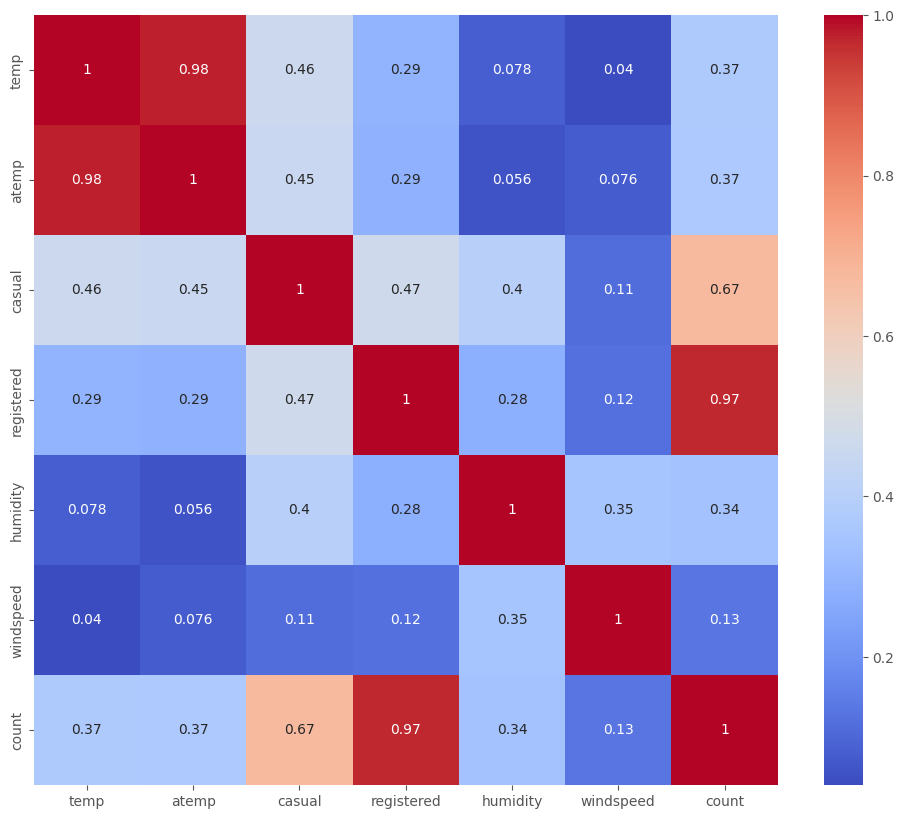

In [ ]:
plt.figure(figsize=(12,10))

sns.heatmap(abs(corrMatt), annot=True, cmap='coolwarm')

- 온도, 습도, 풍속은 거의 상관관계가 없다.
- 대여량과 가장 연관이 높은 건 registered로 등록 된 대여자가 많지만, test 데이터에는 이 값이 없다.
- atemp와 temp는 0.98로 상관관계가 높지만 온도와 체감온도로 피처로 사용하기에 적합하지 않을 수 있다.

<Axes: >

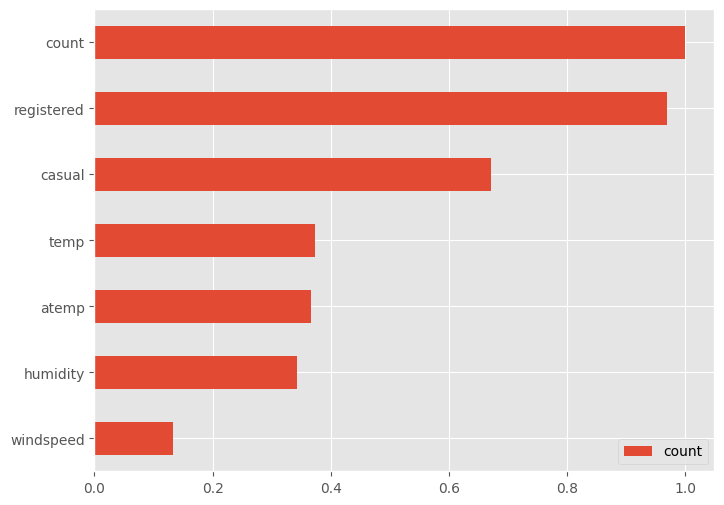

In [ ]:
pd.DataFrame(abs(corrMatt)['count'].sort_values(ascending=True)).plot(kind='barh', figsize=(8,6))

#### 다중공선성

다중공선성 문제(Multicollinearity)는 통계학의 회귀분석에서 독립변수들 간에 강한 상관관계가 나타나는 문제이다. 적절한 회귀분석을 위해 해결해야 하는 문제가 된다.  

해결방법
  - 상관관계가 높은 독립변수 중 하나 혹은 일부를 제거
  - 변수를 변환

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(n_components=1, random_state=args.SEED)
train_tmp = pca.fit_transform(df_corrMatt[['temp', 'atemp']])

In [ ]:
df_corrMatt = df_corrMatt.drop(['temp', 'atemp'], axis=1)

df_corrMatt['temp_pca'] = train_tmp

In [ ]:
pd.DataFrame(abs(df_corrMatt.corr())['count'].sort_values(ascending=False))

,count
count,1.000000
registered,0.969746
casual,0.671897
temp_pca,0.372207
humidity,0.342486
windspeed,0.132384


<Axes: >

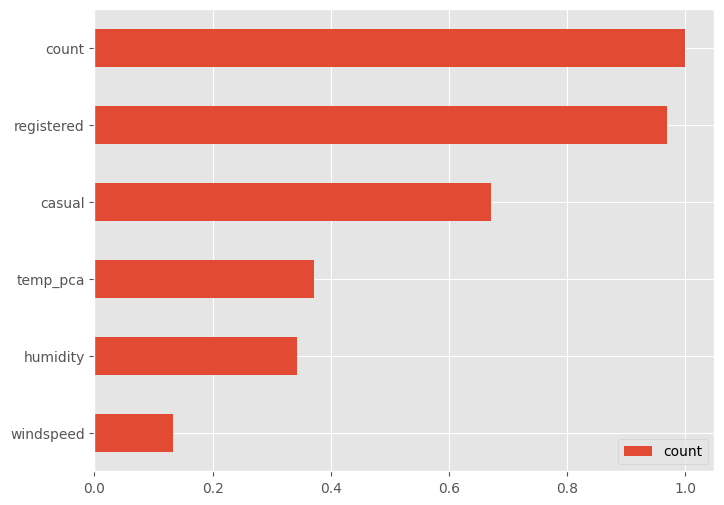

In [ ]:
pd.DataFrame(abs(df_corrMatt.corr())['count'].sort_values(ascending=True)).plot(kind='barh', figsize=(8,6))

### 이상치

<Axes: xlabel='workingday', ylabel='count'>

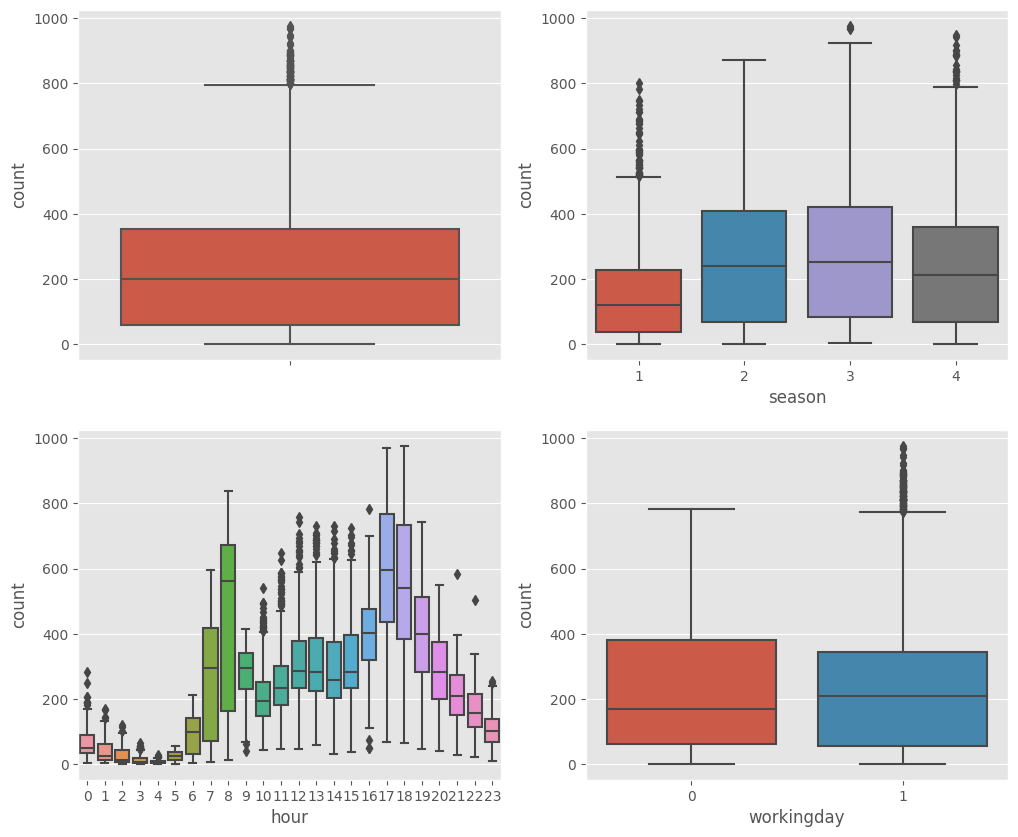

In [ ]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2)
fig.set_size_inches(12,10)

sns.boxplot(data=train12, y='count', orient='v', ax=ax1)
sns.boxplot(data=train12, y='count', x='season', orient='v', ax=ax2)
sns.boxplot(data=train12, y='count', x='hour', orient='v', ax=ax3)
sns.boxplot(data=train12, y='count', x='workingday', orient='v', ax=ax4)

#### Outliers 제거

In [ ]:
trainwithoutOutliers = train12[np.abs(train12['count'] - train12['count'].mean()) <= (3*train12['count'].std())]

print(train12.shape)
print(trainwithoutOutliers.shape)

(5464, 21)
(5434, 21)


((array([-3.65708618, -3.42305846, -3.29413923, ...,  3.29413923,
          3.42305846,  3.65708618]),
  array([0.        , 0.        , 0.        , ..., 6.7546041 , 6.7546041 ,
         6.75925527])),
 (1.388753170912782, 4.801318933542071, 0.9448080931237571))

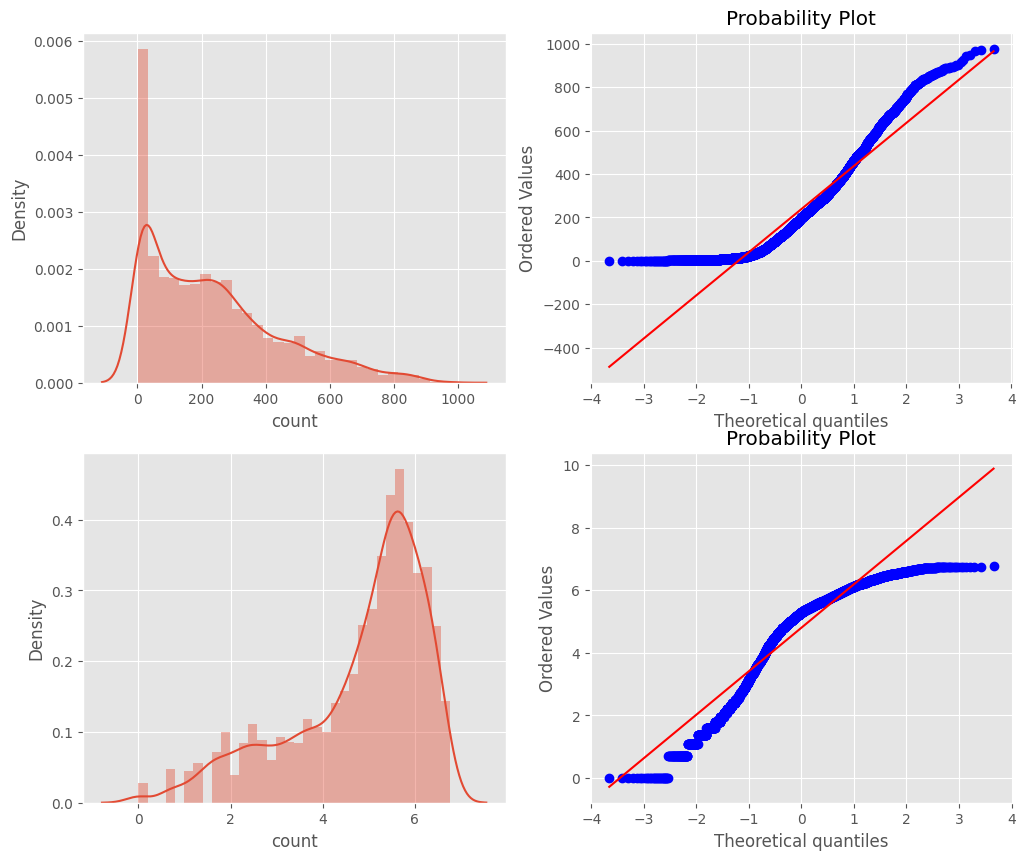

In [ ]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(ncols=2, nrows=2)
fig.set_size_inches(12,10)

sns.distplot(train12['count'], ax=ax1)
stats.probplot(train12['count'], dist='norm', fit=True, plot=ax2)

sns.distplot(np.log(trainwithoutOutliers['count']), ax=ax3)
stats.probplot(np.log(trainwithoutOutliers['count']), dist='norm', fit=True, plot=ax4)